PART 02 파이썬 분석

> CHAPTER 03 제2유형: 데이터 분석
> >SECTION 04 비지도학습
> > >**01 군집분석을 이용한 문제 해결**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans     # K-Means 패키지 임포트

In [3]:
# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [4]:
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# species 컬럼의 값을 0,1,2로 레이블인코딩 한다.
from sklearn.preprocessing import LabelEncoder
df["species"] = LabelEncoder().fit_transform(df["species"])
df.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [7]:
df_copy = df     # 기존 데이터프레임 복사본 생성

In [9]:
# 변수간 상관관계 시각화
import seaborn as sns
from matplotlib import pyplot as plt      # 그래프 시각화
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
sns.pairplot(df, hue="species")           # 데이터특징들간의 상관관계 표현
plt.show()

In [10]:
# KMeans 객체 생성
cluster1 = KMeans(n_clusters=3, n_init=10, max_iter=500, random_state=42, algorithm='auto')

# 생성모델로 데이터 학습
cluster1.fit(df)
KMeans(max_iter=500, n_clusters=3, random_state=42)

KMeans(max_iter=500, n_clusters=3, random_state=42)

In [11]:
# 결과 값을 변수에 저장
cluster_center = cluster1.cluster_centers_    # 각 군집의 중심점 결과 저장
cluster_prediction = cluster1.predict(df)     # 각 예측군집 결과 저장
print(pd.DataFrame(cluster_center))
print(cluster_prediction)

          0         1         2         3         4
0  6.622449  2.983673  5.573469  2.032653  2.000000
1  5.006000  3.428000  1.462000  0.246000  0.000000
2  5.915686  2.764706  4.264706  1.333333  1.019608
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [12]:
# 기존 데이터에 예측된 군집 결과를 붙인다.
df_copy["cluster"]=cluster_prediction
df_copy

sepal_length  sepal_width  petal_length  petal_width  species  cluster
0             5.1          3.5           1.4          0.2        0        1
1             4.9          3.0           1.4          0.2        0        1
2             4.7          3.2           1.3          0.2        0        1
3             4.6          3.1           1.5          0.2        0        1
4             5.0          3.6           1.4          0.2        0        1
..            ...          ...           ...          ...      ...      ...
145           6.7          3.0           5.2          2.3        2        0
146           6.3          2.5           5.0          1.9        2        0
147           6.5          3.0           5.2          2.0        2        0
148           6.2          3.4           5.4          2.3        2        0
149           5.9          3.0           5.1          1.8        2        0

[150 rows x 6 columns]

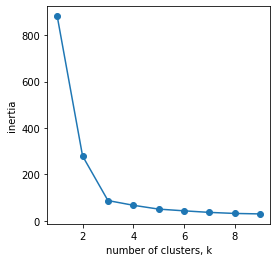

In [13]:
# 적절한 K에 대해 붓꽃 데이터프레임을 넣어 K와 inertia를 비교
# 값(3)이 적합한 변화시점임을 알 수 있음
scope = range(1,10)
inertias = []

for k in scope:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)

# K 개수와 inertia 비교 시각화
plt.figure(figsize=(4, 4))

plt.plot(scope, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

>>>**02 연관분석을 이용한 문제 해결**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# apriori, association_rules 모듈 호출
from mlxtend.frequent_patterns import apriori, association_rules

In [21]:
from google.colab import drive
drive.mount('/content/drive')

# pandas의 read_csv 함수 통한 csv 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/retail_dataset.csv', sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df

0       1       2       3       4       5       6
0     Bread    Wine    Eggs    Meat  Cheese  Pencil  Diaper
1     Bread  Cheese    Meat  Diaper    Wine    Milk  Pencil
2    Cheese    Meat    Eggs    Milk    Wine     NaN     NaN
3    Cheese    Meat    Eggs    Milk    Wine     NaN     NaN
4      Meat  Pencil    Wine     NaN     NaN     NaN     NaN
..      ...     ...     ...     ...     ...     ...     ...
310   Bread    Eggs  Cheese     NaN     NaN     NaN     NaN
311    Meat    Milk  Pencil     NaN     NaN     NaN     NaN
312   Bread  Cheese    Eggs    Meat  Pencil  Diaper    Wine
313    Meat  Cheese     NaN     NaN     NaN     NaN     NaN
314    Eggs    Wine   Bagel   Bread    Meat     NaN     NaN

[315 rows x 7 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


In [24]:
# 장바구니 데이터 고유항목 구분 출력
items = set()
for col in df:
    items.update(df[col].unique())

# 장바구니 목록 값(텍스트)을 수치로 표현-각 항목당 매칭될 경우 1로, 아니면 0으로 표시(one-hot encoding)
itemset = set(items)
encoding = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    dismatching = list(itemset - rowset)
    matching = list(itemset.intersection(rowset))
    for i in dismatching:
        labels[i] = 0
    for j in matching:
        labels[j] = 1
    encoding.append(labels)
encoding[0]
result = pd.DataFrame(encoding)

result

NaN  Bagel  Milk  Pencil  Wine  Diaper  Meat  Eggs  Bread  Cheese
0      0      0     0       1     1       1     1     1      1       1
1      0      0     1       1     1       1     1     0      1       1
2      1      0     1       0     1       0     1     1      0       1
3      1      0     1       0     1       0     1     1      0       1
4      1      0     0       1     1       0     1     0      0       0
..   ...    ...   ...     ...   ...     ...   ...   ...    ...     ...
310    1      0     0       0     0       0     0     1      1       1
311    1      0     1       1     0       0     1     0      0       0
312    0      0     0       1     1       1     1     1      1       1
313    1      0     0       0     0       0     1     0      0       1
314    1      1     0       0     1       0     1     1      1       0

[315 rows x 10 columns]

In [25]:
#첫째 NaN 열항목 삭제
result = result.drop(result.columns[0], axis=1)

result

Bagel  Milk  Pencil  Wine  Diaper  Meat  Eggs  Bread  Cheese
0        0     0       1     1       1     1     1      1       1
1        0     1       1     1       1     1     0      1       1
2        0     1       0     1       0     1     1      0       1
3        0     1       0     1       0     1     1      0       1
4        0     0       1     1       0     1     0      0       0
..     ...   ...     ...   ...     ...   ...   ...    ...     ...
310      0     0       0     0       0     0     1      1       1
311      0     1       1     0       0     1     0      0       0
312      0     0       1     1       1     1     1      1       1
313      0     0       0     0       0     1     0      0       1
314      1     0       0     1       0     1     1      1       0

[315 rows x 9 columns]

In [26]:
# apriori 함수 적용
freq_items = apriori(result, min_support=0.2, use_colnames=True)

In [27]:
# association_rules로 규칙 도출(신뢰도 임계치 0.6 기반)
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

antecedents consequents  antecedent support  consequent support   support  \
0     (Bagel)     (Bread)            0.425397            0.504762  0.279365   
1    (Cheese)      (Milk)            0.501587            0.501587  0.304762   
2      (Milk)    (Cheese)            0.501587            0.501587  0.304762   
3      (Wine)    (Cheese)            0.438095            0.501587  0.269841   
4      (Eggs)      (Meat)            0.438095            0.476190  0.266667   

   confidence      lift  leverage  conviction  
0    0.656716  1.301042  0.064641    1.442650  
1    0.607595  1.211344  0.053172    1.270148  
2    0.607595  1.211344  0.053172    1.270148  
3    0.615942  1.227986  0.050098    1.297754  
4    0.608696  1.278261  0.058050    1.338624